<a href="https://colab.research.google.com/github/ErenErchamion/machinelearningmidterm/blob/main/machinelearningmidterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

# 1. Veri Setinin Yüklenmesi
# 1.1 Breast Cancer Wisconsin veri setini yükleme
data = load_breast_cancer()

# 1.2 Veri çerçevesi oluşturma
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

print("X shape:", X.shape)
print("y shape:", y.shape)

# İlk 5 satırı göster
print("\nX first 5 rows:")
display(X.head())

print("\ny first 5 values:")
display(y.head())


X shape: (569, 30)
y shape: (569,)

X first 5 rows:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



y first 5 values:


,target
0,0
1,0
2,0
3,0
4,0


In [37]:
# 2.1 Eksik Değer Analizi
missing_per_col = X.isna().sum()
print("Missing values per column:")
print(missing_per_col)

if missing_per_col.sum() == 0:
    print("\nYorum: Veri setinde eksik değer yok, doldurma yapmaya gerek yok.")
else:
    # Örnek: sayısal sütunlar için mean ile doldurma
    X = X.fillna(X.mean())
    print("\nEksik değerler mean ile dolduruldu.")

# 2.2 Aykırı Değer Analizi - Z-score yöntemi
from scipy import stats

z_scores = np.abs(stats.zscore(X))
outlier_counts = (z_scores > 3).sum(axis=0)
outlier_counts = pd.Series(outlier_counts, index=X.columns)

print("\nOutlier counts per feature (Z-score > 3):")
print(outlier_counts)

print("\nYorum: Birçok özellikte Z-score>3 olan gözlemler (aykırılar) var.")
print("Aykırılar özellikle lineer modellere (ör. Logistic Regression) daha duyarlı olabilir;")
print("ağaç tabanlı modeller (Decision Tree, Random Forest, XGBoost) genellikle aykırılara daha dayanıklıdır.")

# 2.3 Veri Tipi ve Dağılım İncelemesi
dtypes = X.dtypes
print("\nDTypes:")
print(dtypes)

num_cols = (dtypes == "float64").sum() + (dtypes == "int64").sum()
# Bu veri setinde kategorik değişken yok, ama genel hali:
cat_cols = (dtypes == "object").sum()

print(f"\nSayısal değişken sayısı: {num_cols}")
print(f"Kategorik değişken sayısı: {cat_cols}")
print("Yorum: Breast Cancer veri setinde tüm özellikler sayısal; kategorik değişken yok.")


Missing values per column:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

Yorum: Veri setinde eksik değer yok, doldurma yapmaya gerek yok.

Outlier counts per feat

İstatistiksel özet (ilk 5 özellik):


,mean,median,min,max,std,Q1,Q3
mean radius,14.127292,13.37000,6.98100,28.1100,3.524049,11.70000,15.7800
mean texture,19.289649,18.84000,9.71000,39.2800,4.301036,16.17000,21.8000
mean perimeter,91.969033,86.24000,43.79000,188.5000,24.298981,75.17000,104.1000
mean area,654.889104,551.10000,143.50000,2501.0000,351.914129,420.30000,782.7000
mean smoothness,0.096360,0.09587,0.05263,0.1634,0.014064,0.08637,0.1053


Yorum: Bu tablo her özellik için merkezi eğilim ve yayılım ölçülerini gösterir;
örneğin mean radius değeri genel tümör boyutuna dair tipik büyüklüğü verir.


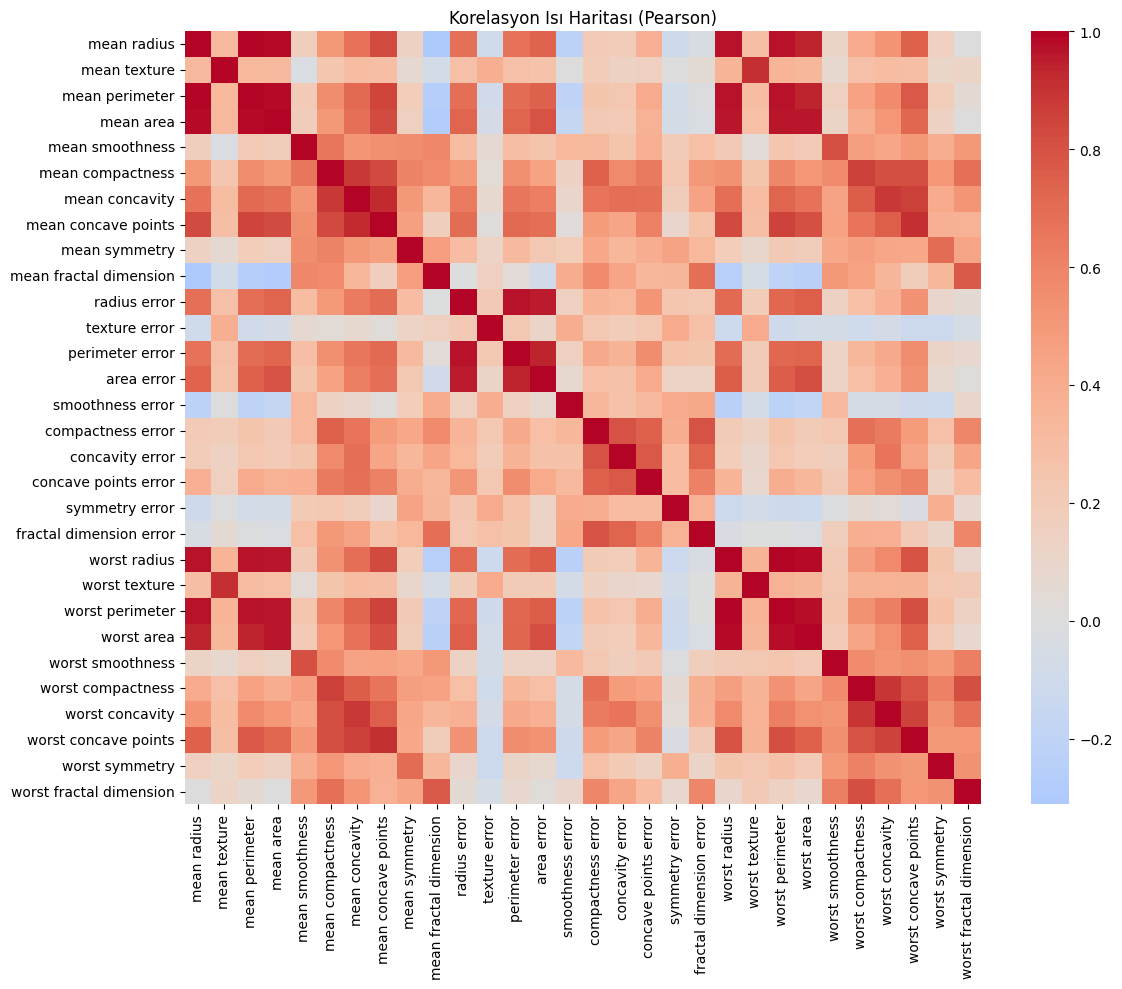


En yüksek korelasyonlu 3 çift özellik:
mean perimeter  mean radius        0.997855
worst radius    worst perimeter    0.993708
mean area       mean radius        0.987357
dtype: float64

Yorum: Bu yüksek korelasyonlu özellik çiftleri, aynı yapıyı farklı açılardan ölçen
özellikler olabilir (örneğin radius, perimeter, area gibi tümör boyutu ile ilgili ölçümler).


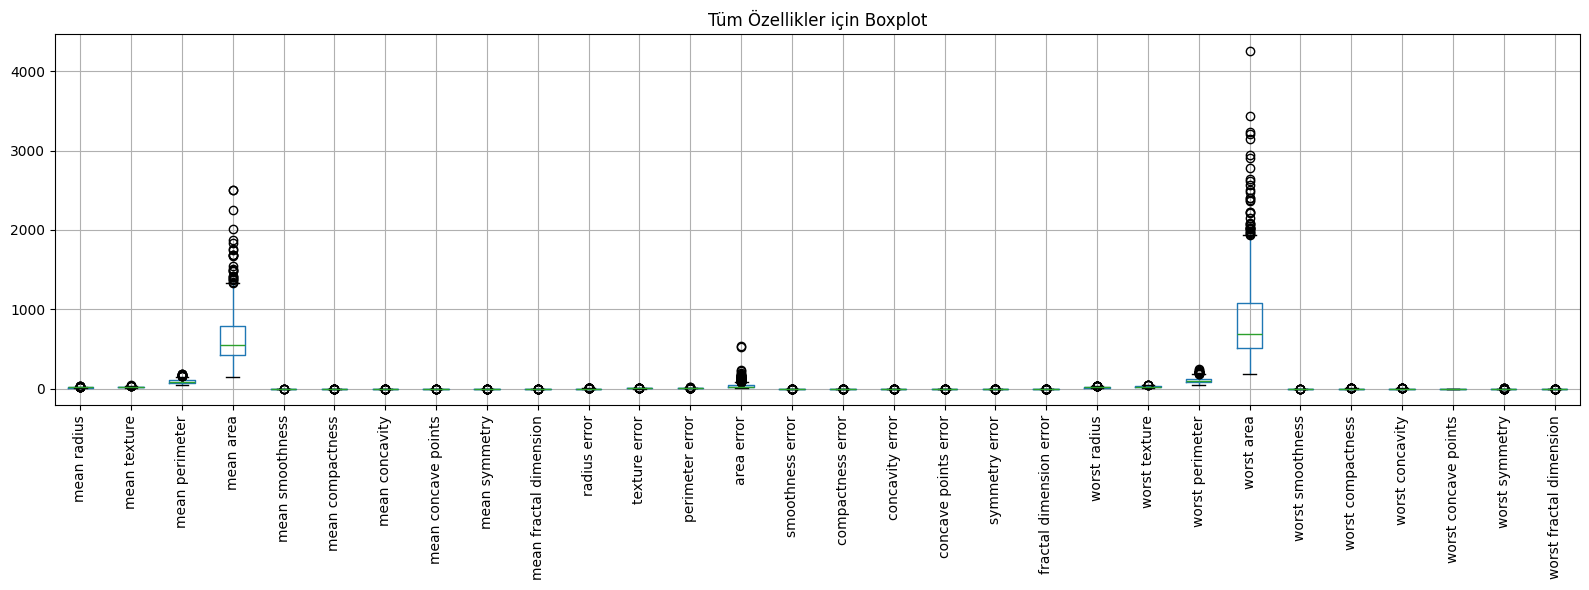

Yorum: Boxplot'lar özellikle bazı özelliklerde uç değerlerin (outliers) olduğunu gösteriyor;
örneğin mean area, mean perimeter gibi özelliklerde uzun kuyruklar gözleniyor.


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# 3.1 İstatistiksel Özellikler: mean, median, min, max, std, Q1, Q3
desc = X.describe(percentiles=[0.25, 0.5, 0.75]).T
desc = desc.rename(columns={"25%": "Q1", "50%": "median", "75%": "Q3"})
eda_table = desc[["mean", "median", "min", "max", "std", "Q1", "Q3"]]

print("İstatistiksel özet (ilk 5 özellik):")
display(eda_table.head())

print("Yorum: Bu tablo her özellik için merkezi eğilim ve yayılım ölçülerini gösterir;")
print("örneğin mean radius değeri genel tümör boyutuna dair tipik büyüklüğü verir.")

# 3.2 Korelasyon Matrisi ve Heatmap
corr = X.corr(method="pearson")

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Korelasyon Isı Haritası (Pearson)")
plt.tight_layout()
plt.show()

corr_abs = corr.abs()
np.fill_diagonal(corr_abs.values, 0)
top_pairs = corr_abs.unstack().sort_values(ascending=False).drop_duplicates().head(3)
print("\nEn yüksek korelasyonlu 3 çift özellik:")
print(top_pairs)

print("\nYorum: Bu yüksek korelasyonlu özellik çiftleri, aynı yapıyı farklı açılardan ölçen")
print("özellikler olabilir (örneğin radius, perimeter, area gibi tümör boyutu ile ilgili ölçümler).")

# 3.3 Boxplot Analizi (tüm özellikler için)
plt.figure(figsize=(16, 6))
X.boxplot(rot=90)
plt.title("Tüm Özellikler için Boxplot")
plt.tight_layout()
plt.show()

print("Yorum: Boxplot'lar özellikle bazı özelliklerde uç değerlerin (outliers) olduğunu gösteriyor;")
print("örneğin mean area, mean perimeter gibi özelliklerde uzun kuyruklar gözleniyor.")


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

RANDOM_STATE = 42

# 5. Veri Setinin Bölünmesi
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.20, random_state=RANDOM_STATE, stratify=y
)

# Train+val'i tekrar böl: train (0.7), val (0.1) olacak şekilde
# toplam trainval oranı = 0.8, bunun içinde val oranı = 0.1 / 0.8 = 0.125
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.125, random_state=RANDOM_STATE, stratify=y_trainval
)

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)

# 4. StandardScaler ile ölçeklendirme (X_scaled)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("\nYorum: Özellikler StandardScaler ile ölçeklendi (ortalama 0, std 1).")
print("Bu özellikle PCA, LDA ve uzaklık/tabanlı bazı algoritmalar için önemlidir.")


Train shape: (398, 30)
Validation shape: (57, 30)
Test shape: (114, 30)

Yorum: Özellikler StandardScaler ile ölçeklendi (ortalama 0, std 1).
Bu özellikle PCA, LDA ve uzaklık/tabanlı bazı algoritmalar için önemlidir.


Explained variance ratio (ilk 10): [0.44917196 0.18895762 0.09355838 0.06689297 0.0542569  0.03903572
 0.02195285 0.01547002 0.01289341 0.01184626]
Mean explained variance ratio: 0.03333333333333333
Seçilen PCA bileşen sayısı: 6


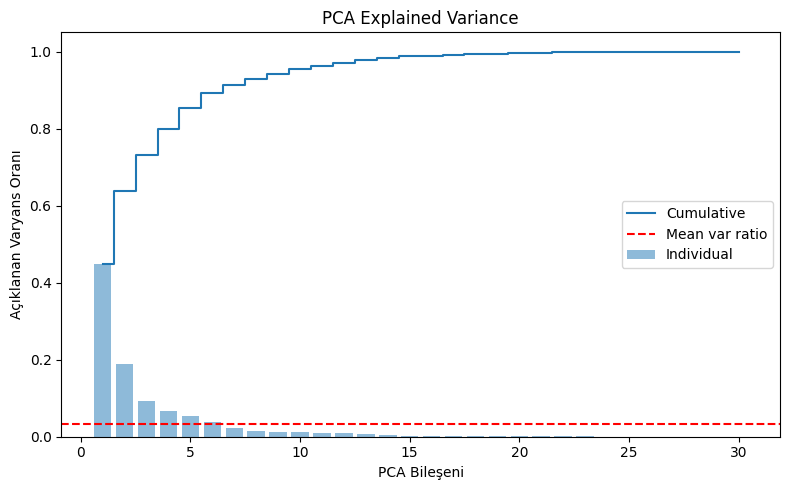

Yorum: Kırmızı kesikli çizgi ortalama açıklanan varyans oranını gösteriyor;
bu değerden büyük katkı yapan bileşenler seçildi.


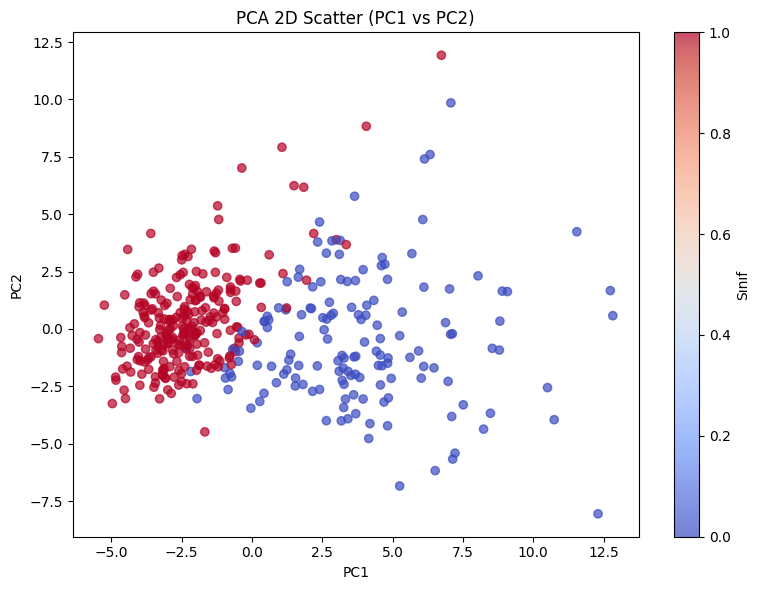

Yorum: PC1 ve PC2 uzayında sınıfların kısmen ayrıştığı görülüyor;
bu da PCA'nın sınıflar arasında bazı yapısal farklılıkları yakaladığını gösterir.


In [40]:
from sklearn.decomposition import PCA

# PCA: tüm bileşenleri hesapla
pca_full = PCA(random_state=RANDOM_STATE)
pca_full.fit(X_train_scaled)

explained = pca_full.explained_variance_ratio_
cumulative = np.cumsum(explained)

# Bileşen sayısını: explained variance ratio ortalamasından büyük olan bileşenler
mean_var_ratio = explained.mean()
n_components_pca = int((explained > mean_var_ratio).sum())

print("Explained variance ratio (ilk 10):", explained[:10])
print("Mean explained variance ratio:", mean_var_ratio)
print("Seçilen PCA bileşen sayısı:", n_components_pca)

pca = PCA(n_components=n_components_pca, random_state=RANDOM_STATE)
pca.fit(X_train_scaled)

X_train_pca = pca.transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Explained variance grafiği
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained) + 1), explained, alpha=0.5, label="Individual")
plt.step(range(1, len(explained) + 1), cumulative, where="mid", label="Cumulative")
plt.axhline(y=mean_var_ratio, color="red", linestyle="--", label="Mean var ratio")
plt.xlabel("PCA Bileşeni")
plt.ylabel("Açıklanan Varyans Oranı")
plt.title("PCA Explained Variance")
plt.legend()
plt.tight_layout()
plt.show()

print("Yorum: Kırmızı kesikli çizgi ortalama açıklanan varyans oranını gösteriyor;")
print("bu değerden büyük katkı yapan bileşenler seçildi.")

# En iyi iki PCA bileşeni ile 2D scatter
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap="coolwarm", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA 2D Scatter (PC1 vs PC2)")
plt.colorbar(scatter, label="Sınıf")
plt.tight_layout()
plt.show()

print("Yorum: PC1 ve PC2 uzayında sınıfların kısmen ayrıştığı görülüyor;")
print("bu da PCA'nın sınıflar arasında bazı yapısal farklılıkları yakaladığını gösterir.")


LDA teorik maksimum bileşen sayısı: 1
LDA kullanılacak bileşen sayısı: 1


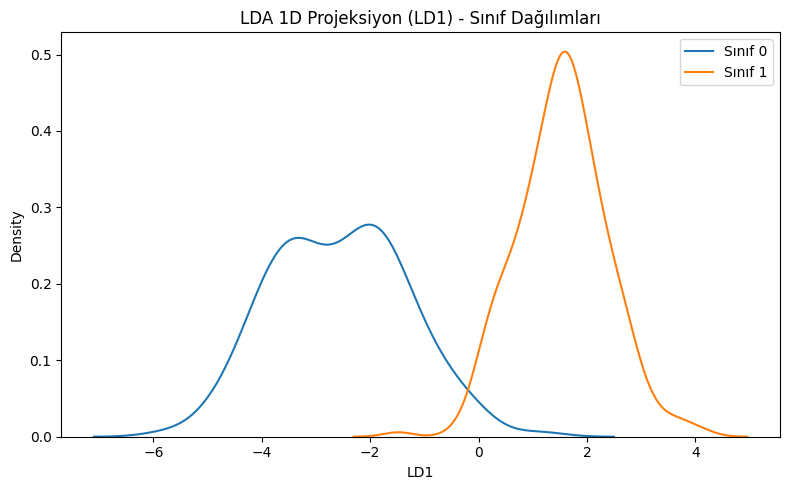

Yorum: 2 sınıflı veri için LDA en fazla 1 diskriminant bileşen üretir;
LD1 üzerinde sınıfların oldukça iyi ayrıştığı görülüyor.


In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# LDA: n_components = 3 isteniyor; ancak 2 sınıflı veri için teorik maksimum 1 bileşen (n_classes - 1)
n_classes = len(np.unique(y_train))
max_lda_components = min(X_train_scaled.shape[1], n_classes - 1)
n_components_lda = min(3, max_lda_components)  # Ödev gereği 3 hedefleniyor ama efektif 1 olacak

print("LDA teorik maksimum bileşen sayısı:", max_lda_components)
print("LDA kullanılacak bileşen sayısı:", n_components_lda)

lda = LinearDiscriminantAnalysis(n_components=n_components_lda)
lda.fit(X_train_scaled, y_train)

X_train_lda = lda.transform(X_train_scaled)
X_val_lda = lda.transform(X_val_scaled)
X_test_lda = lda.transform(X_test_scaled)

# İlk iki LDA bileşeniyle scatter (bu veri setinde efektif 1 bileşen çıkacak)
if X_train_lda.shape[1] >= 2:
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap="coolwarm", alpha=0.7)
    plt.xlabel("LD1")
    plt.ylabel("LD2")
    plt.title("LDA 2D Scatter (LD1 vs LD2)")
    plt.colorbar(scatter, label="Sınıf")
    plt.tight_layout()
    plt.show()
else:
    # 1D projeksiyonun sınıflara göre dağılımını göster
    plt.figure(figsize=(8, 5))
    for label in np.unique(y_train):
        sns.kdeplot(X_train_lda[y_train == label, 0], label=f"Sınıf {label}")
    plt.xlabel("LD1")
    plt.title("LDA 1D Projeksiyon (LD1) - Sınıf Dağılımları")
    plt.legend()
    plt.tight_layout()
    plt.show()

print("Yorum: 2 sınıflı veri için LDA en fazla 1 diskriminant bileşen üretir;")
print("LD1 üzerinde sınıfların oldukça iyi ayrıştığı görülüyor.")


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)

# Temsiller: ham (scaled), PCA, LDA
representations = {
    "raw": {"X_train": X_train_scaled, "X_val": X_val_scaled, "X_test": X_test_scaled},
    "pca": {"X_train": X_train_pca, "X_val": X_val_pca, "X_test": X_test_pca},
    "lda": {"X_train": X_train_lda, "X_val": X_val_lda, "X_test": X_test_lda},
}

# 5 algoritma
def create_models(random_state=RANDOM_STATE):
    return {
        "logistic_regression": LogisticRegression(
            max_iter=1000, random_state=random_state
        ),
        "decision_tree": DecisionTreeClassifier(random_state=random_state),
        "random_forest": RandomForestClassifier(
            n_estimators=200, random_state=random_state
        ),
        "xgboost": XGBClassifier(
            n_estimators=200,
            learning_rate=0.1,
            max_depth=4,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=random_state,
            eval_metric="logloss",  # yeni sürümlerde bu yeterli
        ),
        "gaussian_nb": GaussianNB(),
    }


results = []

for rep_name, splits in representations.items():
    X_tr = splits["X_train"]
    X_v = splits["X_val"]
    models = create_models()
    for model_name, model in models.items():
        model.fit(X_tr, y_train)
        y_val_pred = model.predict(X_v)

        # Olasılık/decision score ROC-AUC için
        if hasattr(model, "predict_proba"):
            y_val_proba = model.predict_proba(X_v)[:, 1]
        elif hasattr(model, "decision_function"):
            y_val_proba = model.decision_function(X_v)
        else:
            y_val_proba = None

        acc = accuracy_score(y_val, y_val_pred)
        prec = precision_score(y_val, y_val_pred)
        rec = recall_score(y_val, y_val_pred)
        f1 = f1_score(y_val, y_val_pred)
        if y_val_proba is not None:
            roc_auc = roc_auc_score(y_val, y_val_proba)
        else:
            roc_auc = np.nan

        results.append(
            {
                "representation": rep_name,
                "model_name": model_name,
                "accuracy": acc,
                "precision": prec,
                "recall": rec,
                "f1": f1,
                "roc_auc": roc_auc,
                "model": model,  # En iyi modeli seçerken lazım olacak
            }
        )

val_df = pd.DataFrame(results).drop(columns=["model"])  # rapor için model objesini tutmaya gerek yok
display(val_df)

print("Yorum: Bu tablo 3 temsil (raw, PCA, LDA) ve 5 algoritma için validation metriklerini karşılaştırıyor.")
print("Genelde ROC-AUC ve F1 değerleri daha ayrıştırıcı olur; en iyi modeli bunlara göre seçeceğiz.")


,representation,model_name,accuracy,precision,recall,f1,roc_auc
0,raw,logistic_regression,0.964912,0.972222,0.972222,0.972222,0.996032
1,raw,decision_tree,0.929825,0.944444,0.944444,0.944444,0.924603
2,raw,random_forest,0.947368,0.945946,0.972222,0.958904,0.975529
3,raw,xgboost,0.947368,0.945946,0.972222,0.958904,0.986772
4,raw,gaussian_nb,0.929825,0.944444,0.944444,0.944444,0.977513
5,pca,logistic_regression,0.964912,0.972222,0.972222,0.972222,0.994709
6,pca,decision_tree,0.912281,0.918919,0.944444,0.931507,0.900794
7,pca,random_forest,0.947368,0.945946,0.972222,0.958904,0.986111
8,pca,xgboost,0.964912,0.972222,0.972222,0.972222,0.990741
9,pca,gaussian_nb,0.929825,0.944444,0.944444,0.944444,0.976190


Yorum: Bu tablo 3 temsil (raw, PCA, LDA) ve 5 algoritma için validation metriklerini karşılaştırıyor.
Genelde ROC-AUC ve F1 değerleri daha ayrıştırıcı olur; en iyi modeli bunlara göre seçeceğiz.


In [43]:
# En iyi modeli ROC-AUC'a göre seç
def safe_metric(row, metric="roc_auc"):
    val = row.get(metric, np.nan)
    if pd.isna(val):
        return -1e9
    return val

best_row = max(results, key=lambda r: safe_metric(r, "roc_auc"))
best_rep = best_row["representation"]
best_model_name = best_row["model_name"]
best_model = best_row["model"]

print("En iyi validation modeli:", best_model_name, "| Temsil:", best_rep)

X_test_best = representations[best_rep]["X_test"]

if hasattr(best_model, "predict_proba"):
    y_test_proba = best_model.predict_proba(X_test_best)[:, 1]
elif hasattr(best_model, "decision_function"):
    y_test_proba = best_model.decision_function(X_test_best)
else:
    y_test_proba = None

y_test_pred = best_model.predict(X_test_best)

test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba) if y_test_proba is not None else np.nan

print("\n9.1 Test Performans Metrikleri:")
print("Accuracy :", test_acc)
print("Precision:", test_prec)
print("Recall   :", test_rec)
print("F1-score :", test_f1)
print("ROC-AUC  :", test_roc_auc)


En iyi validation modeli: logistic_regression | Temsil: raw

9.1 Test Performans Metrikleri:
Accuracy : 0.9736842105263158
Precision: 0.9726027397260274
Recall   : 0.9861111111111112
F1-score : 0.9793103448275862
ROC-AUC  : 0.9947089947089947


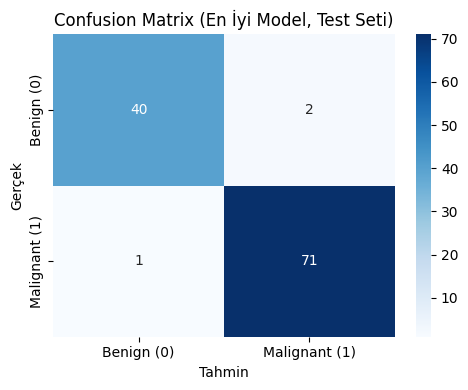

Yorum: Diyagonal elemanlar doğru sınıflandırmaları, diyagonal dışındakiler ise hatalı tahminleri gösterir.


In [44]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Benign (0)", "Malignant (1)"],
            yticklabels=["Benign (0)", "Malignant (1)"])
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.title("Confusion Matrix (En İyi Model, Test Seti)")
plt.tight_layout()
plt.show()

print("Yorum: Diyagonal elemanlar doğru sınıflandırmaları, diyagonal dışındakiler ise hatalı tahminleri gösterir.")


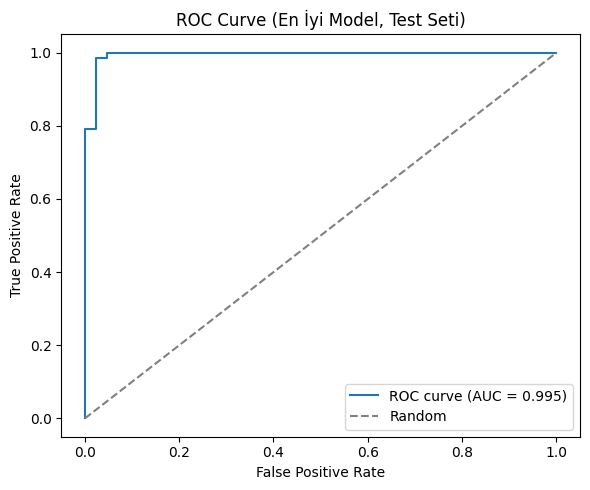

Yorum: ROC eğrisi, farklı eşik (threshold) değerleri için TPR-FPR dengesini gösterir.
Threshold düştükçe model daha fazla pozitif tahmin yapar; recall artarken, false positive sayısı da artar.


In [45]:
from sklearn.metrics import roc_curve, auc

if y_test_proba is not None:
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
    roc_auc_value = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc_value:.3f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="grey", label="Random")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve (En İyi Model, Test Seti)")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

    print("Yorum: ROC eğrisi, farklı eşik (threshold) değerleri için TPR-FPR dengesini gösterir.")
    print("Threshold düştükçe model daha fazla pozitif tahmin yapar; recall artarken, false positive sayısı da artar.")
else:
    print("Bu model için ROC eğrisi hesaplanamıyor (olasılık/skor çıkışı yok).")


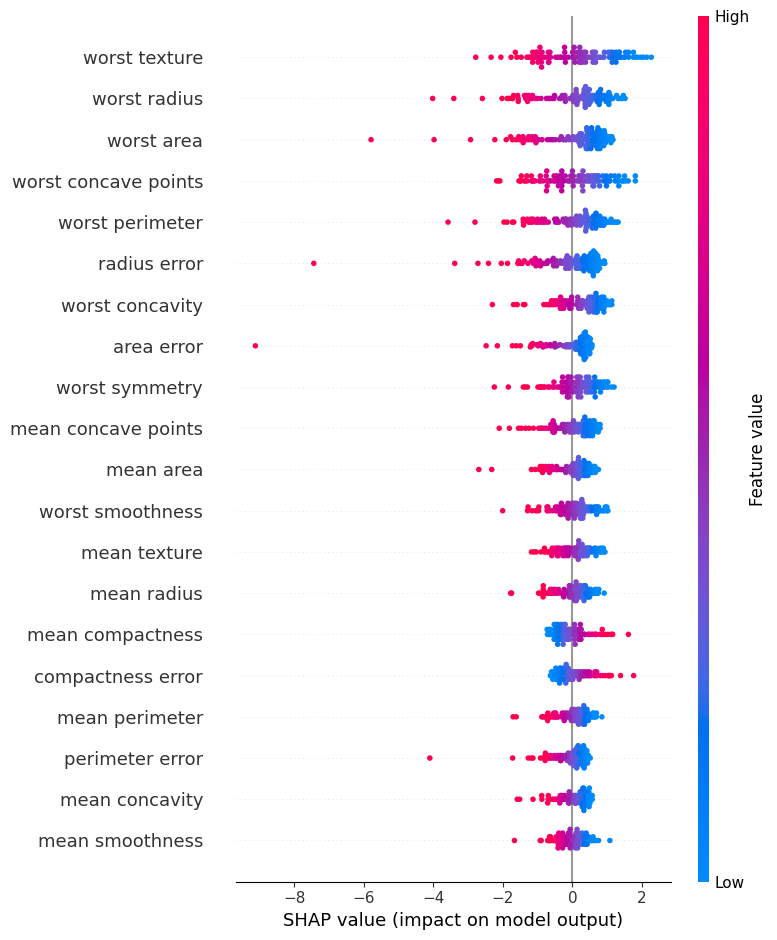

Yorum: summary_plot, tüm örneklerdeki SHAP değerlerinin dağılımını gösterir;
en üstteki özellikler model tahminlerine en çok katkı yapanlardır.


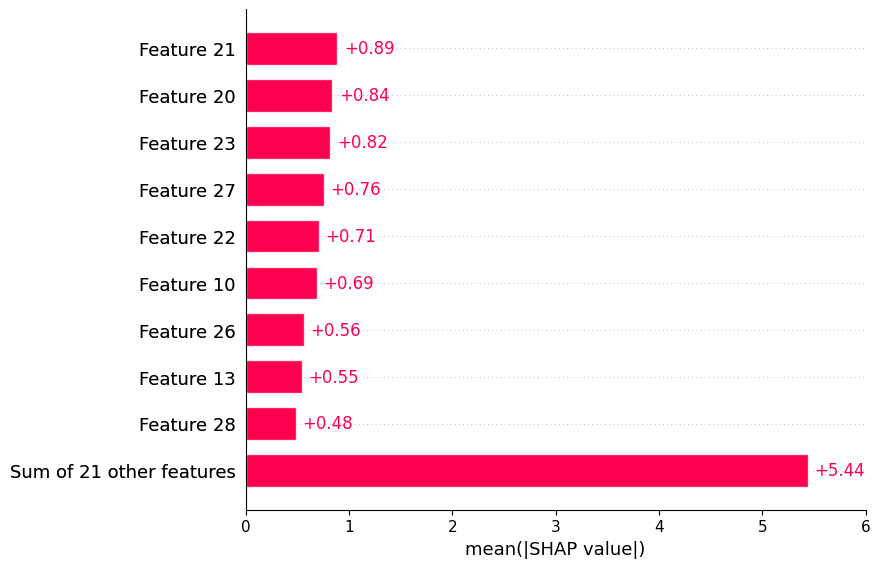

Yorum: bar_plot, özelliklerin ortalama mutlak SHAP değerine göre önem sırasını özetler.
Bu sıralama, modelde hangi özelliklerin daha baskın olduğunu gösterir.


In [46]:
import shap

# SHAP için arka plan (background) verisi: train setinden bir örnek alt küme
background = representations[best_rep]["X_train"]
if background.shape[0] > 100:
    background = background[:100]

X_test_rep = representations[best_rep]["X_test"]

# 10.1 En İyi Validation Modeli için SHAP Analizi
explainer = shap.Explainer(best_model, background)
shap_values = explainer(X_test_rep)

# Özellik isimlerini temsil türüne göre ayarla
if best_rep == "raw":
    feature_names = X.columns.tolist()
elif best_rep == "pca":
    feature_names = [f"PC{i+1}" for i in range(X_train_pca.shape[1])]
elif best_rep == "lda":
    feature_names = [f"LD{i+1}" for i in range(X_train_lda.shape[1])]
else:
    feature_names = [f"f{i}" for i in range(X_test_rep.shape[1])]

shap.summary_plot(shap_values, X_test_rep, feature_names=feature_names, show=True)
print("Yorum: summary_plot, tüm örneklerdeki SHAP değerlerinin dağılımını gösterir;")
print("en üstteki özellikler model tahminlerine en çok katkı yapanlardır.")

shap.plots.bar(shap_values, max_display=10)
print("Yorum: bar_plot, özelliklerin ortalama mutlak SHAP değerine göre önem sırasını özetler.")
print("Bu sıralama, modelde hangi özelliklerin daha baskın olduğunu gösterir.")



SHAP Analizi - Temsil: raw, Model: logistic_regression


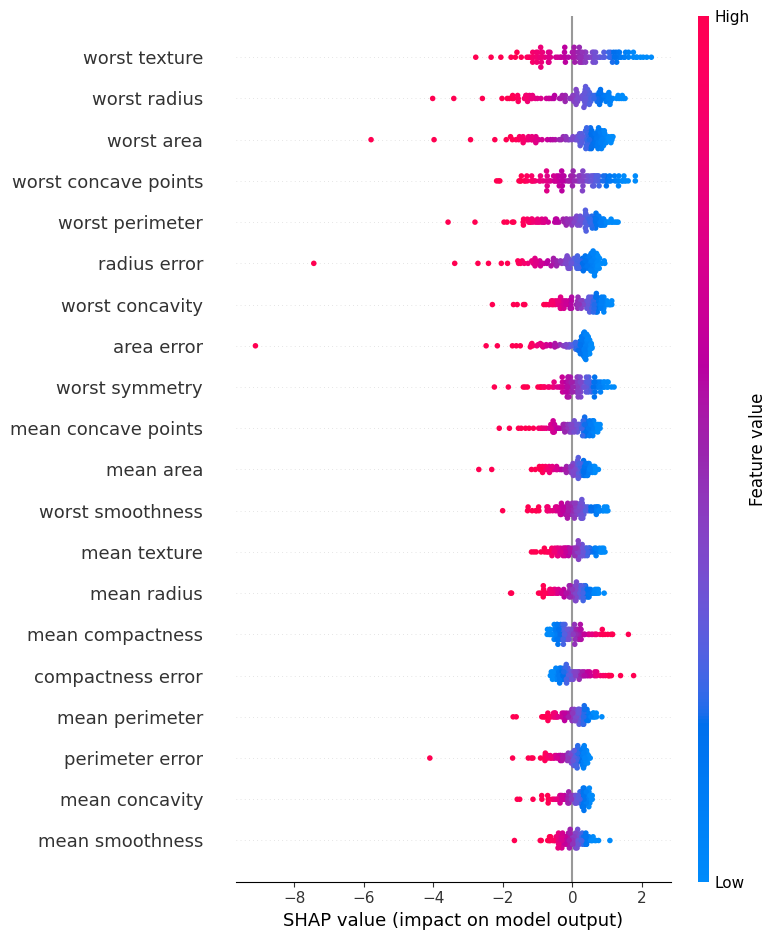

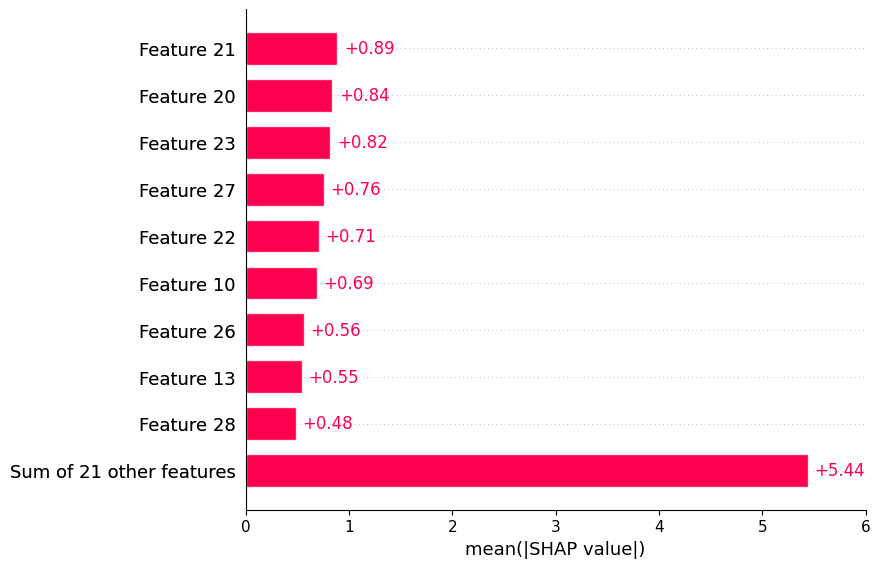

Yorum: raw temsilinde modelin hangi bileşenlerden etkilendiği görülüyor.
Ham özelliklerde, fiziksel olarak anlamlı özellikler (ör. radius, perimeter, area) öne çıkıyor.

SHAP Analizi - Temsil: pca, Model: logistic_regression


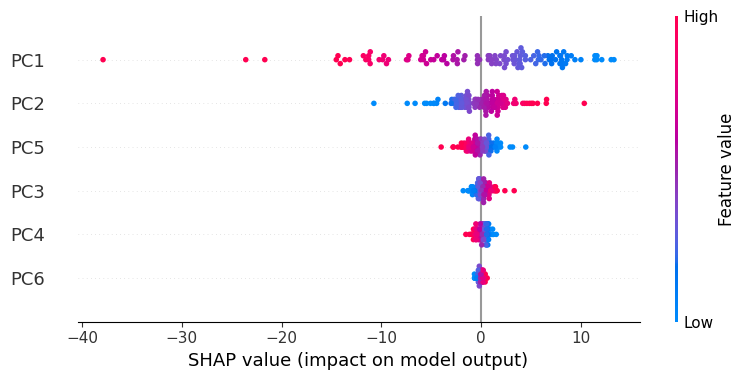

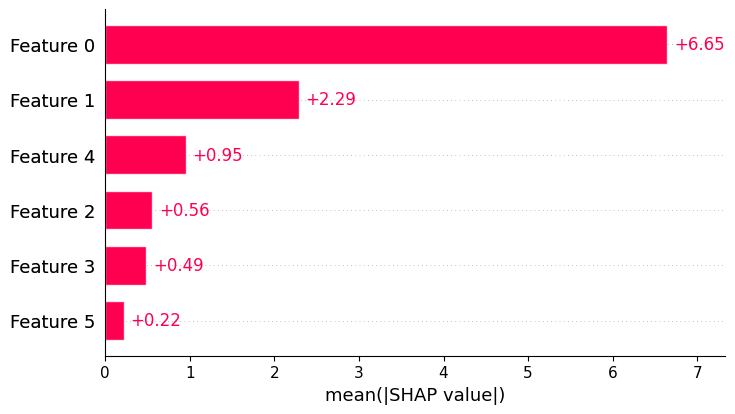

Yorum: pca temsilinde modelin hangi bileşenlerden etkilendiği görülüyor.
PCA bileşenlerinde, kombinasyon halindeki bileşenler sınıflandırma için önemli.

SHAP Analizi - Temsil: lda, Model: random_forest


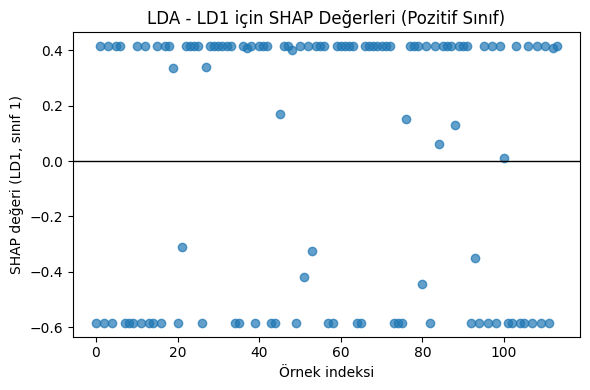

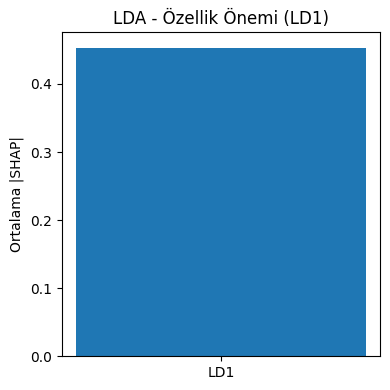

Yorum: lda temsilinde modelin hangi bileşenlerden etkilendiği görülüyor.
LDA bileşen(ler)i, sınıflar arasındaki ayrımı maksimum yapan doğrusal kombinasyonlardır.


In [47]:
for rep_name, info in best_per_rep.items():
    print(f"\nSHAP Analizi - Temsil: {rep_name}, Model: {info['model_name']}")
    model = info["model"]
    X_train_rep = representations[rep_name]["X_train"]
    X_test_rep = representations[rep_name]["X_test"]

    # Arka plan verisi (background)
    if X_train_rep.shape[0] > 100:
        bg = X_train_rep[:100]
    else:
        bg = X_train_rep

    # Özellik isimleri
    if rep_name == "raw":
        feature_names = X.columns.tolist()
    elif rep_name == "pca":
        n_comp = X_train_pca.shape[1]
        feature_names = [f"PC{i+1}" for i in range(n_comp)]
    else:  # lda
        n_comp = X_train_lda.shape[1]
        feature_names = [f"LD{i+1}" for i in range(n_comp)]

    explainer = shap.Explainer(model, bg)
    shap_values = explainer(X_test_rep)

    # LDA için özel yol (tek bileşen varsa)
    if rep_name == "lda" and X_test_rep.shape[1] == 1:
        # shap_values Explanation içinden values dizisini al
        vals = getattr(shap_values, "values", shap_values)
        vals = np.array(vals)

        # Beklenen durumlar:
        # (n_samples, 1)    -> doğrudan tek bileşen
        # (n_samples, 1, 2) -> 2 sınıf için ayrı SHAP; pozitif sınıfı (index 1) alacağız
        if vals.ndim == 1:
            # zaten (n_samples,)
            pass
        elif vals.ndim == 2:
            # (n_samples, 1) gibi bir şey
            if vals.shape[1] == 1:
                vals = vals[:, 0]
            else:
                # varsayılmadık durum, ilk sütunu al
                vals = vals[:, 0]
        elif vals.ndim == 3:
            # (n_samples, 1, n_classes) bekliyoruz
            n_samples, n_feat, n_classes = vals.shape
            # Tek özellik (LD1) bekliyoruz
            if n_feat != 1:
                raise ValueError(f"LDA SHAP: Beklenmedik feature sayısı: {n_feat}")
            # İki sınıf var, pozitif sınıfın (1) SHAP değerini al
            # İstersen class 0 için de ayrı grafik yapabilirsin
            if n_classes >= 2:
                vals = vals[:, 0, 1]
            else:
                vals = vals[:, 0, 0]
        else:
            raise ValueError(f"Beklenmeyen SHAP values şekli: {vals.shape}")

        # Artık vals: (n_samples,) boyutunda 1D vektör
        n_samples = vals.shape[0]
        x_idx = np.arange(n_samples)

        import matplotlib.pyplot as plt

        # LD1 için SHAP scatter
        plt.figure(figsize=(6, 4))
        plt.scatter(x_idx, vals, alpha=0.7)
        plt.axhline(0, color="black", linewidth=1)
        plt.xlabel("Örnek indeksi")
        plt.ylabel("SHAP değeri (LD1, sınıf 1)")
        plt.title("LDA - LD1 için SHAP Değerleri (Pozitif Sınıf)")
        plt.tight_layout()
        plt.show()

        # Ortalama mutlak SHAP değeri bar olarak
        mean_abs_shap = np.mean(np.abs(vals))
        plt.figure(figsize=(4, 4))
        plt.bar(["LD1"], [mean_abs_shap])
        plt.ylabel("Ortalama |SHAP|")
        plt.title("LDA - Özellik Önemi (LD1)")
        plt.tight_layout()
        plt.show()
    else:
        # Ham ve PCA (veya çok boyutlu LDA) için normal summary + bar plot
        shap.summary_plot(shap_values, X_test_rep, feature_names=feature_names, show=True)
        shap.plots.bar(shap_values, max_display=10)

    print("Yorum:", rep_name, "temsilinde modelin hangi bileşenlerden etkilendiği görülüyor.")
    if rep_name == "raw":
        print("Ham özelliklerde, fiziksel olarak anlamlı özellikler (ör. radius, perimeter, area) öne çıkıyor.")
    elif rep_name == "pca":
        print("PCA bileşenlerinde, kombinasyon halindeki bileşenler sınıflandırma için önemli.")
    else:
        print("LDA bileşen(ler)i, sınıflar arasındaki ayrımı maksimum yapan doğrusal kombinasyonlardır.")
